In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('converted_csv.csv')

vc = df['Name'].value_counts()
names_to_remove = vc[vc<5].index.values
df['Name'].loc[df['Name'].isin(names_to_remove)] = np.nan
df.dropna(inplace=True)

df.reset_index(inplace=True)

df['Name'] = df['Name'].str.strip()
df['Text'] = df['Text'].str.strip()
df['Time'] = df['Time'].str.strip()

deleted = df['Text'] == 'DeletedMsg'
deleted_counts = df[deleted]['Name'].value_counts()
dic = dict(deleted_counts)

names = list(dic.keys())[:5]
messages = list(dic.values())[:5]

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

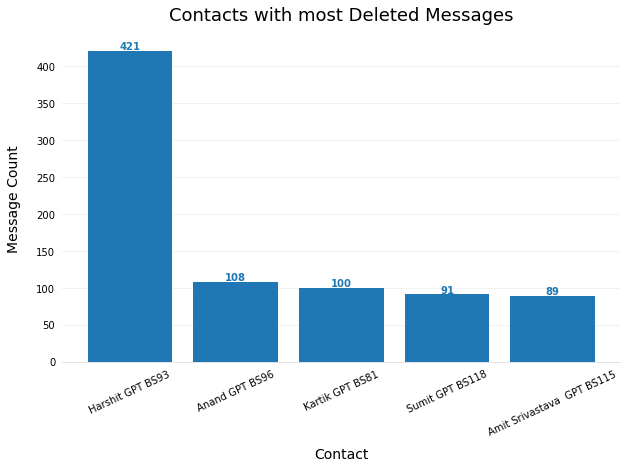

In [3]:
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(names, messages)



# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()
for bar in bars:
      ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 2,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
)


plt.xlabel('Contact', size=14, labelpad=10)
plt.ylabel('Message Count', size=14, labelpad=15)
ax.set_title('Contacts with most Deleted Messages', size=18, pad=15)
plt.xticks(rotation=25)



In [4]:
df.sample(5)

,index,Date,Time,Text,Name
34550,40033,25/06/20,3:01 pm,MediaShared,Harshit GPT BS93
24578,27218,13/03/20,2:48 pm,hame b bulana😂😂,Amit Yadav GPT
19830,21949,15/01/20,10:27 pm,😂😂😂😂,Riya
27851,32591,06/04/20,11:28 am,😂,Naitik Chem.
15223,16970,02/12/19,10:15 am,mail kiya h maine,RIDDHAM SADANA


In [21]:
df.head(5)

,index,Date,Time,Text,Name,TextLen
0,0,27/07/19,9:34 pm,MediaShared,Aryan G,11
1,1,27/07/19,9:38 pm,kidhar krna hai inhe,Rishabh PI,20
2,2,27/07/19,9:38 pm,assignments ki alag notebook bnegi?,Rishabh PI,35
3,3,27/07/19,9:38 pm,make a seperate tutorial copy,Peeyush GT,29
4,4,27/07/19,9:39 pm,or assignment copy,Peeyush GT,18


In [28]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

In [31]:
df.dropna(inplace=True)

In [34]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(inplace=True)